In [45]:
import numpy as np

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

In [62]:
## Define a function (giving few trial examples of non-linear function for which we are interested in finding the roots)
def f(x):
   return x**3 - 2*x - 5.0

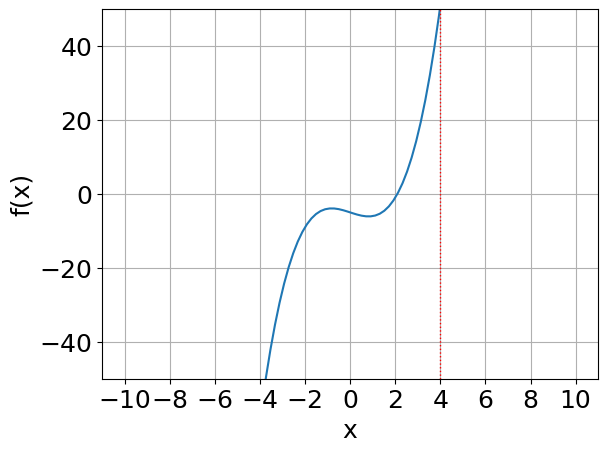

In [48]:
## Plotting the functions using matlpotlib.pyplot
plt.rc("font", size=18) # "runtime configuration"

#data
x = np.linspace(-10, 10, 100)

fig, ax = plt.subplots() # plt.subplots() creates a figure (fig) and a set of subplots or axes (ax).
ax.plot(x, f(x)) # it plots the function f(x) against x.

ax.set(xlabel='x', ylabel='f(x)')
ax.set_ylim(-50, 50)
ax.set_xticks(np.arange(-10, 10.01,2)) # sets the locations of the ticks on the x-axis

# plotting one of the roots of f(x) = x**3 - 15*x -4.0
root = 4.0
ax.axvline(x=root, ls=":", lw=1, color='r') # Draws a vertical line on the plot at the specified x-coordinate.
# ls(line style), lw(line width), axvline(axes vertical line)

ax.grid() # enables or disables the grid lines on the plot.
## ax.grid(which='both', color='gray', linestyle='--', linewidth=0.5)

plt.show()

In [65]:
## Define a function to implement Bisection method for root finding
def bisection(f,x1,x2,tol=1e-6):
    if(f(x1)*f(x2)>0):
        return f"Change the choice of interval"

    # searching for root within 500 iterations
    for i in range(500):
        xm = (x1+x2)/2
        if(f(x1)*f(xm)<0):
            x2 = xm
        else:
            x1 = xm

        if(abs(f(xm))<tol):
            return f"root found at x = {round(xm,2)} in {i+1} iterations"
    
    return f"can't find the root" 

In [67]:
##Finding the root of f(x) defined in th cell above
##Choose bracketing region by giving you choice of values for x1 and x2
x1 = -1
x2 = 6
tol = 1e-6 #you can always choose more stringent tolerance value

# Uncomment below line to try time library. It can help you to check time of execution for your code
import time
tstart = time.time()
print(bisection(f, x1, x2, tol))
tstop = time.time()
t = tstop-tstart
print('total time taken =', t)

root found at x = 2.09 in 26 iterations
total time taken = 0.0


In [72]:
##Did you find all the roots of the above function?
##Vary the bracketing range and try finding other roots.
x1 = -2
x2 = 2
tol = 1e-6

print(bisection(f, x1, x2, tol))

Change the choice of interval


#### Question: Can you map the x-range (or plot the curve in the domain -10 to 10) between [-10, 10] and find out how does the choice of your bracketing interval affect the root that you find?

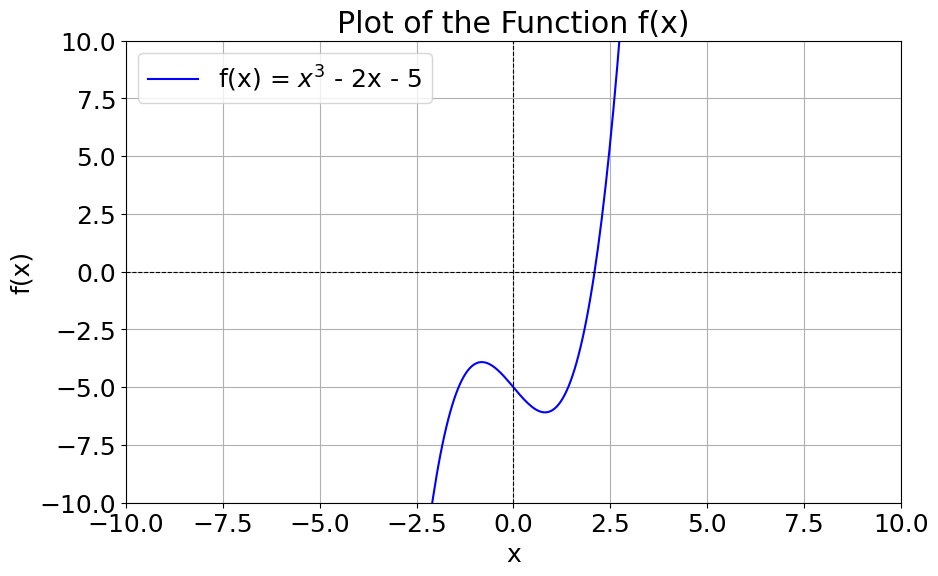

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to plot
def f(x):
    return x**3 - 2*x - 5  # Example function: f(x) = x^3 - 2x -5

# Create an array of x values
x = np.linspace(-10, 10, 400)  # 400 points between -10 and 10

# Calculate the corresponding y values
y = f(x)

# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(x, y, label='f(x) = $x^3$ - 2x - 5', color='blue')  # Plot the curve
plt.axhline(0, color='black', lw=0.8, ls='--')  # Add x-axis
plt.axvline(0, color='black', lw=0.8, ls='--')  # Add y-axis
plt.title('Plot of the Function f(x)')  # Title of the plot
plt.xlabel('x')  # Label for x-axis
plt.ylabel('f(x)')  # Label for y-axis
plt.grid()  # Show grid
plt.legend()  # Show legend
plt.xlim(-10, 10)  # Set x-axis limits
plt.ylim(-10, 10)  # Set y-axis limits
plt.show()  # Display the plot

#### Graph  of $f(x)$:
$$ f(x)=x^3-15x-4 $$

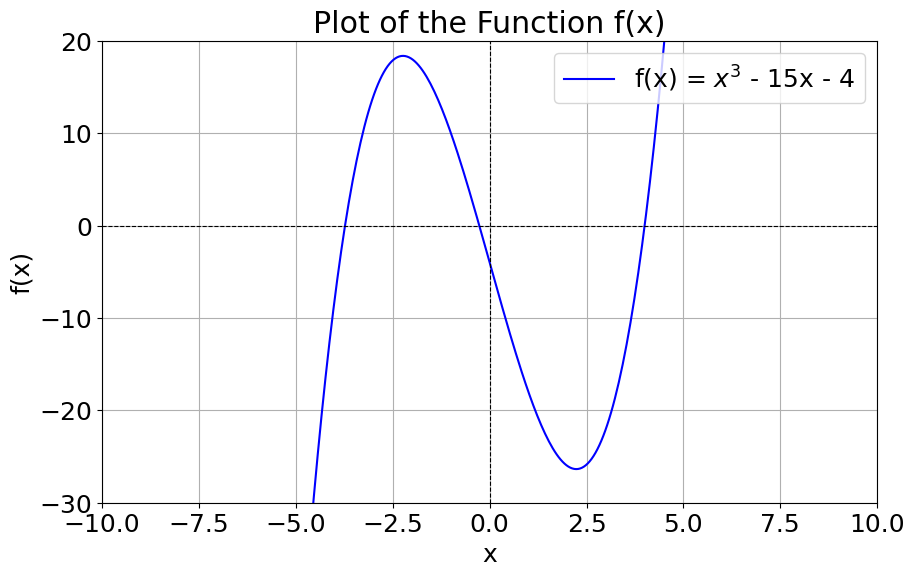

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to plot
def f(x):
    return x**3 - 15*x - 4  # Example function: f(x) = x^3 - 15x - 4

# Create an array of x values
x = np.linspace(-10, 10, 400)  # 400 points between -10 and 10

# Calculate the corresponding y values
y = f(x)

# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(x, y, label='f(x) = $x^3$ - 15x - 4', color='blue')  # Plot the curve
plt.axhline(0, color='black', lw=0.8, ls='--')  # Add x-axis
plt.axvline(0, color='black', lw=0.8, ls='--')  # Add y-axis
plt.title('Plot of the Function f(x)')  # Title of the plot
plt.xlabel('x')  # Label for x-axis
plt.ylabel('f(x)')  # Label for y-axis
plt.grid()  # Show grid
plt.legend()  # Show legend
plt.xlim(-10, 10)  # Set x-axis limits
plt.ylim(-30, 20)  # Set y-axis limits
plt.show()  # Display the plot

Choice of Intervals:
* root 1 : [-5,-3]
* root 2 : [-2,0]
* root 3 : [3,5]

In [104]:
# define the function
def f1(x):
   return x**3 - 15*x - 4.0

# guessing interval
x1, x2 = -5, -3
print(bisection(f1, x1, x2, tol))
# guessing interval
x1, x2 = -2, 0
print(bisection(f1, x1, x2, tol))
# guessing interval
x1, x2 = 3, 8
print(bisection(f1, x1, x2, tol))

root found at x = -3.73 in 24 iterations
root found at x = -0.27 in 24 iterations
root found at x = 4.0 in 26 iterations


In [78]:
## Newton-Raphson method [ It is a single-point method (x0) ]

In [95]:
# define function and its derivative
def f(x):
    return x**3 - 15*x - 4

def df(x):
    return 3*x**2 - 15

In [99]:
def newton(f, df, x0, tol):
    for i in range(500):
        x = x0 - f(x0)/df(x0)
        if abs(f(x)) < tol:
            return f"root found at x = {round(x,2)} in {i+1} iterations"
        x0 = x

    return f"root not found"

In [106]:
# choose starting value of x
x0 = 6
print(newton(f, df, x0, tol=1e-6))

# choose starting value of x
x0 = -6
print(newton(f, df, x0, tol=1e-6))

# choose starting value of x
x0 = 1
print(newton(f, df, x0, tol=1e-6))

root found at x = 4.0 in 5 iterations
root found at x = -3.73 in 5 iterations
root found at x = -0.27 in 4 iterations


#### $Ques^n$: Do you observe that the Newton-Raphson method converges faster than Bisection method? Can you tweak the above codes to check how many iterations it took to solve for f(x) using Newtons Method vs. Bisection Method?

#### $Ans$: Yes, Newton-Raphson Method converges faster than Bisection Method, already tweaked the above codes to check the number of iterations

### References:
#https://pythonnumericalmethods.berkeley.edu/notebooks/chapter19.04-Newton-Raphson-Method.html

##### Implementation of Newton-Raphson Method using recursion:

In [108]:
def my_newton(f, df, x0, tol):
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)

In [110]:
x0 = 6

root = my_newton(f, df, x0, tol=1e-6)

print('root =', root)
print('func val =,', f(root))

root = 4.000000000036533
func val =, 1.2056062814735924e-09


#### Question: Does both the functions give same answer?

$Ans:$
- If implemented correctly with identical settings, both methods will give the same answers, though the loop-based method will be faster and more practical.
- Loop-based implementation is generally more efficient because it avoids the overhead of recursive calls.
- Recursive implementation is more prone to stack overflow if the number of iterations needed is large.

In [122]:
# define function
def f(x):
    return x**(1/3)

def df(x):
    return (1/3)*x**(-2/3)

## It is always a good practice to plot the function before solving it!

In [131]:
x1 = 1
tol = 1e-6

print(newton(f, df, x1, tol))

root not found


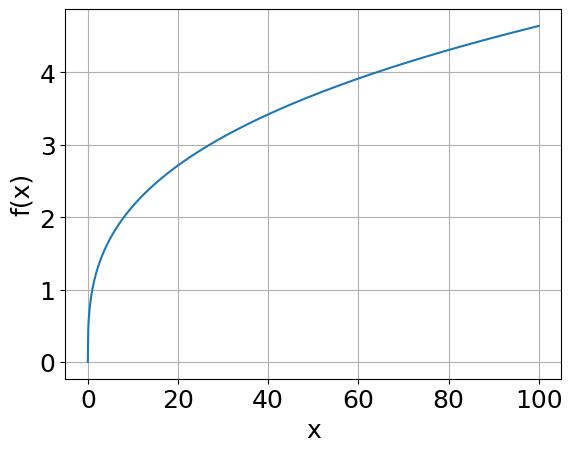

In [111]:
plt.rc("font", size=18)

#data
x = np.linspace(1e-10, 100, 1000)
#x = np.linspace(-10, -1, 100)

fig, ax = plt.subplots()
ax.plot(x, x**(1/3))

ax.set(xlabel='x', ylabel='f(x)')

ax.grid()
plt.show()

In [ ]:
# Secant method (https://en.wikipedia.org/wiki/Secant_method) is Two-point method

In [ ]:
def secant(f,a,b,N):
    '''Approximate solution of f(x)=0 on interval [a,b] by the secant method.

    Parameters
    ----------
    f : function
        The function for which we are trying to approximate a solution f(x)=0.
    a,b : numbers
        The interval in which to search for a solution. The function returns
        None if f(a)*f(b) >= 0 since a solution is not guaranteed.
    N : (positive) integer
        The number of iterations to implement.

    Returns
    -------
    m_N : number
        The x intercept of the secant line on the the Nth interval
            m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        The initial interval [a_0,b_0] is given by [a,b]. If f(m_n) == 0
        for some intercept m_n then the function returns this solution.
        If all signs of values f(a_n), f(b_n) and f(m_n) are the same at any
        iterations, the secant method fails and return None.

    Examples
    --------
    >>> f = lambda x: x**2 - x - 1
    >>> secant(f,1,2,5)
    1.6180257510729614
    '''
    if f(a)*f(b) >= 0:
        print("Secant method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Secant method fails.")
            return None
    return a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))

In [ ]:
# define function
def f(x):
    return x**3 - 2.*x - 5.0

def df(x):
    return 3*x**2 - 2.

In [ ]:
## choose the bracketing region (always helpful to plot the function)

x1 = 0
x2 = 5

tol = 1e-3
itr = 100

In [ ]:
root = secant(f, x1, x2, itr)

print('root =', root)
print('func val =,', f(root))

root = 2.0945514815423216
func val =, -5.5067062021407764e-14


In [134]:
print(bisection(f, x1, x2, tol))

Change the choice of interval


In [ ]:
rootn = newton(f, df, x1, tol)

print('root =', rootn)
print('func val =,', f(rootn))

found root
root = 2.0945835767773096
func val =, 0.00035823543943003244


In [ ]:
f(2.0945514815423216)

-5.5067062021407764e-14

In [ ]:
a = (2.0945514815423216 - 2.0943514815423216)/2.0945514815423216
print("%.12f" % a)

0.000095485836


In [ ]:
##plot
# plt.rc("font", size=18)

# #data
# x = np.linspace(-10, 10, 100)

# fig, ax = plt.subplots()
# ax.plot(x, f(x))

# ax.set(xlabel='x', ylabel='f(x)')
# ax.set_ylim(-50, 50)
# #ax.set_xticks(np.arange(-10, 10.01,2))

# ax.axvline(x=2.094, ls=":", lw=1, color='r')

# ax.grid()

# plt.show()

#### Question: Are any of the above methods find the solution for the function f(x) =  x**(1/3)? Can you tweak above functions to solve for f(x)?

In [ ]:
# define function
def f(x):
    return x**3 + 2.*x**2 -x +5.0

def df(x):
    return 3*x**2 + 4*x -1.0

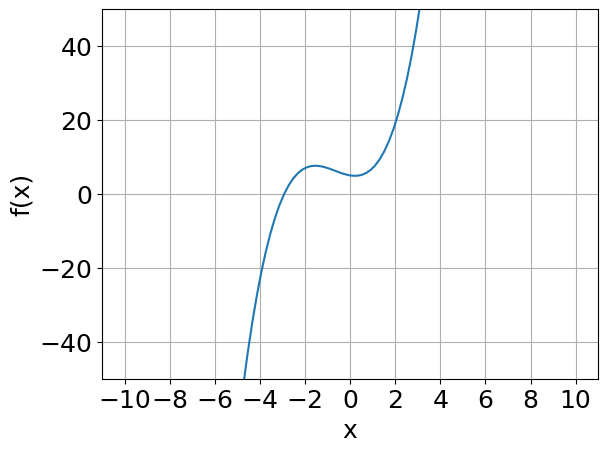

In [ ]:
## Plotting the functions using matlpotlib
plt.rc("font", size=18)

#data
x = np.linspace(-10, 10, 100)

fig, ax = plt.subplots()
ax.plot(x, f(x))

ax.set(xlabel='x', ylabel='f(x)')
ax.set_ylim(-50, 50)
ax.set_xticks(np.arange(-10, 10.01,2))

## plotting one of the roots of f(x) = x**3 - 15*x -4.0
#root=4.0
#ax.axvline(x=root, ls=":", lw=1, color='r')

ax.grid()

plt.show()

In [ ]:
##choose a starting value

x1 = -5
tol = 1e-3

In [ ]:
type(x1)

int

In [ ]:
rootn = newton(f, df, x1, tol)

print('root =', rootn)
print('func val =,', f(rootn))

found root
root = -2.925851606864172
func val =, -7.188365271915131e-07


#### Question: f(x) = x**3 + 2.*x**2 -x +5.0 is a function degree three? If x = -2.92585 is one of the root, what are the other roots of f(x)?

#### Question: Can you write a function to implement fixed point method?